### RandomForest

1) It is supervised learning algorithm used for Classification and Regression.<br>
2) Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.<br>
3) Random forest is an ensemble learning algorithm which follows the Bagging technique.<br>
4) Bagging stands for <b>Bootstrap Aggragation</b><br>
5) Fundamental concept behind Random Forest: A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.<br>
6) It uses <b>bagging and feature randomness</b> when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.<br>
7) <b>Bootstrapping(selection with replacement)</b> - Random forest takes advantage of this by allowing each individual tree to randomly sample from the dataset with replacement, resulting in different trees. This process is known as bagging.<br>
8) <b>Feature randomness</b> - In a normal decision tree, when it is time to split a node, we consider every possible feature and pick the one that produces the most separation between the observations in the left node vs. those in the right node. In contrast, each tree in a random forest can pick only from a random subset of features. This forces even more variation amongst the trees in the model and ultimately results in lower correlation across trees and more diversification.

9) <b>Aggregation</b> After the individual decision trees have generated their prediction, the results of multiple decision trees are aggregated(mode computation). The model computes the prediction having the highest frequency amongst the results of the different decision trees participating in the Random Forest. 
Aggregation is also referred to as Majority voting or Averaging or Mode computation

<img src="rf1.svg" width="500" depth="500">

#### Hyperparameters in RandomForest

1) n_estimators : number of trees to be used in the Random Forest<br>
2) criterion : gini or entropy<br>
3) max_depth : used to set max depth of each tree<br>
4) min_samples_split : minimumn number of samples below which there will be no splitting<br>
5) max_features : Used to define the number of features to use in each Decision Tree<br>

In [ ]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns

In [ ]:
df = pd.read_csv('WineQT.csv')
df.head()  # top 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.shape
# num of rows=1143, num of cols = 13

(1143, 13)

#### Handling null values

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

#### Checking data types

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

#### Checking dupliacte records

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

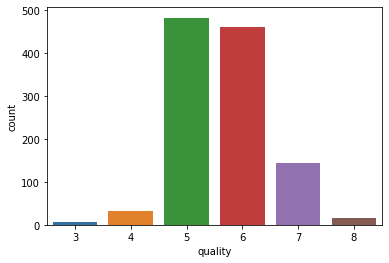

In [ ]:
sns.countplot(x=df['quality'])
plt.show()

In [ ]:
df['Id'].nunique()

1143

In [ ]:
df.drop('Id',inplace=True,axis=1)
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Selecting the independent and dependent features

In [ ]:
x = df.iloc[:,:-1]   # x = df.drop('quality',axis=1)
y = df.iloc[:,-1]    # y = df['quality']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(1143, 11)
(1143,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### Splitting data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(1143*0.25)

285.75


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=22)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(857, 11)
(286, 11)
(857,)
(286,)


#### Creating Functions to compute Confusion matrix, Classification report and to generate Training and Testing Score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print('Accuracy Score',accuracy_score(ytest,ypred))
    print(classification_report(ytest,ypred,zero_division=0))
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training accuracy
    print('Testing Score',model.score(x_test,y_test))     # testing accuracy

#### Build the model

In [ ]:
rf = RandomForestClassifier(n_estimators=80,criterion='gini',min_samples_split=15,max_depth=8)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=15, n_estimators=80)

#### Computing training and Tetsing Scores

In [ ]:
mscore(rf)
# data is not balanced

Training Score 0.8168028004667445
Testing Score 0.6678321678321678


#### Model Predictions

In [ ]:
ypred_rf = rf.predict(x_test)
print(ypred_rf)

[6 6 6 5 5 6 6 5 5 6 5 6 7 5 6 5 5 5 5 6 5 5 5 5 6 7 5 6 6 5 6 6 6 6 6 5 5
 5 5 7 5 5 6 6 5 5 6 6 6 6 6 6 6 6 6 5 5 6 6 6 6 6 6 5 5 6 5 7 6 5 5 7 6 5
 6 5 7 6 5 6 5 6 5 6 5 6 6 5 7 5 5 5 6 6 7 5 5 7 5 6 6 5 6 7 5 5 6 5 5 5 6
 6 5 6 6 5 5 6 5 5 5 6 6 5 6 6 5 5 6 5 5 5 6 5 5 5 7 5 5 5 5 6 5 6 5 6 5 6
 5 5 5 5 6 5 5 6 6 5 6 7 6 6 5 7 6 6 6 7 6 6 6 5 7 6 5 6 6 7 6 5 5 6 5 5 7
 5 5 5 6 5 5 6 7 5 6 6 5 6 5 5 5 6 5 6 6 6 6 6 5 6 5 5 6 5 6 6 6 6 5 5 5 5
 6 5 5 5 6 6 6 7 6 6 5 6 5 5 6 5 5 6 5 5 6 6 6 6 6 5 5 6 6 6 5 5 6 6 5 6 5
 6 6 5 5 6 5 6 5 7 5 6 5 5 5 6 5 6 6 6 6 5 5 6 6 7 6 6]


#### Evaluating the model

In [ ]:
cls_eval(y_test,ypred_rf)

[[ 0  0  2  0  0  0]
 [ 0  0  1  2  0  0]
 [ 0  0 95 28  1  0]
 [ 0  0 33 84  7  0]
 [ 0  0  1 18 12  0]
 [ 0  0  0  1  1  0]]
Accuracy Score 0.6678321678321678
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.72      0.77      0.74       124
           6       0.63      0.68      0.65       124
           7       0.57      0.39      0.46        31
           8       0.00      0.00      0.00         2

    accuracy                           0.67       286
   macro avg       0.32      0.31      0.31       286
weighted avg       0.65      0.67      0.66       286



### Plot RandomForest

In [ ]:
from sklearn.tree import plot_tree

In [ ]:
cn = ['5','6','7','4','8','3']
fn = x_train.columns
print(cn)
print(fn)

['5', '6', '7', '4', '8', '3']
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


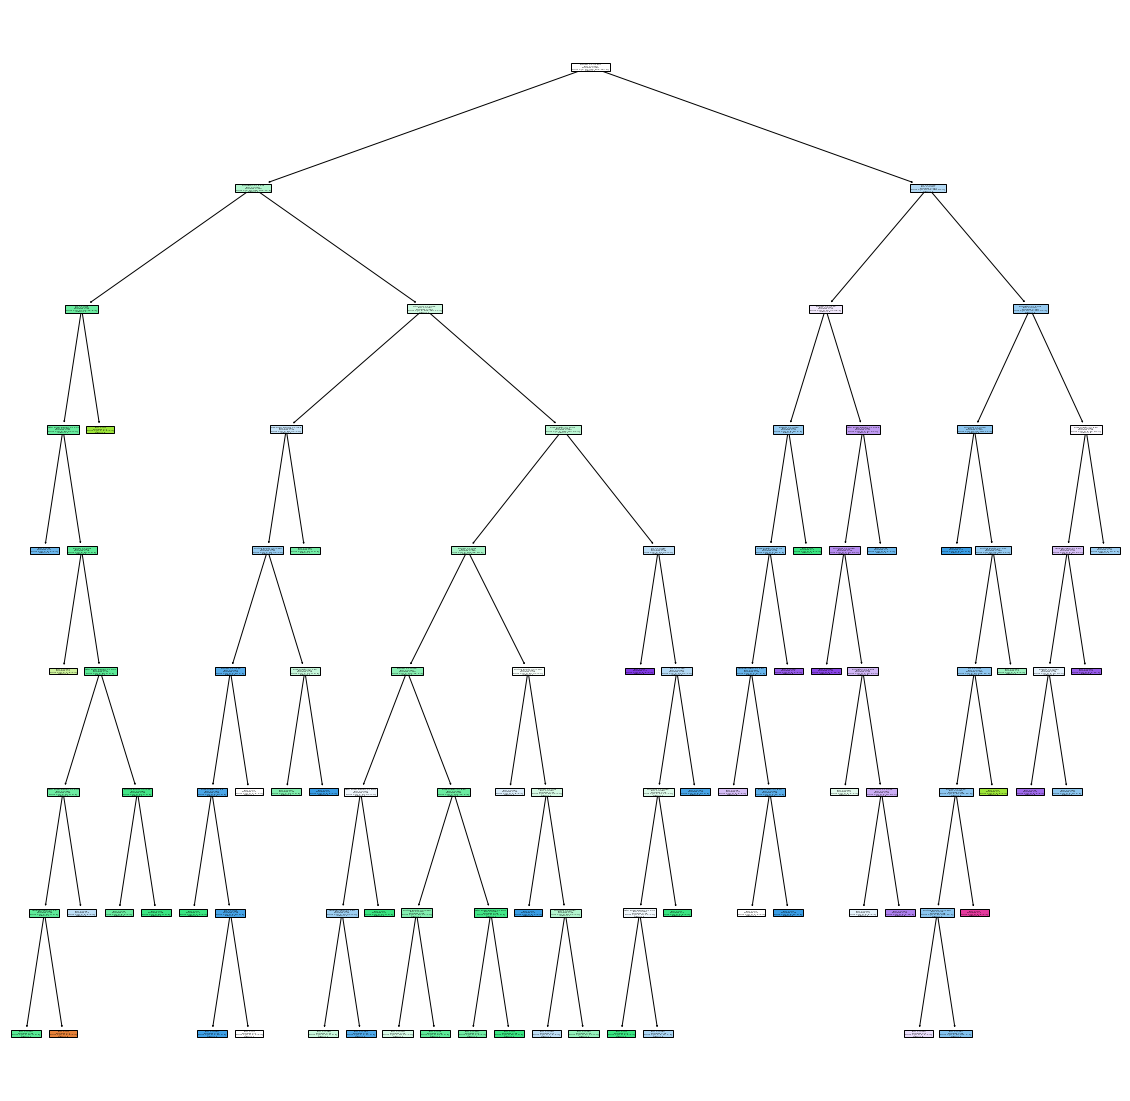

In [ ]:
plt.figure(figsize=(20,20))
# Plotting Deciion Tree at index 0
plot_tree(rf.estimators_[0],class_names=cn,feature_names=fn,filled=True)
plt.show()